# Apple Data cleaning and EDA Project

# Executive Summary


# 1.Data Quality: Handled a dataset of 1M+ rows with 74% missing date values and 10% missing IDs.
# 2.Cleaning Logic: Filtered out negative quantities and extreme outliers ($>15$ units) to normalize the mean.
# 3.Key Insight: Product [Insert Top Product ID] is the volume leader, while sales trends show a peak in [Insert Month].

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel(r"C:\Users\dilli\OneDrive\Desktop\Apple data analysis\Apple raw sales data set.xlsx")
df

,sale_id,sale_date,store_id,product_id,quantity
0,NAN,2023-06-16,ST-10,NaN,10.0
1,QX-999001,2022-04-13,ST-63,P-48,NaN
2,JG-46890,2021-07-05,ST-26,P-79,5000.0
3,XJ-1731,NaT,ST-15,P-24,9.0
4,FG-95080,NaT,ST-35,P-69,7.0
...,...,...,...,...,...
1048570,VL-85855,NaT,ST-41,nan,3.0
1048571,QL-10736,2021-04-11,ST-57,P-14,3.0
1048572,NAN,NaT,ST-49,NAN,7.0
1048573,XC-40156,NaT,ST-75,NaN,2.0


In [3]:
df.isnull().sum()

sale_id        76987
sale_date     781253
store_id       77120
product_id     77100
quantity      157314
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   sale_id     971588 non-null  object        
 1   sale_date   267322 non-null  datetime64[ns]
 2   store_id    971455 non-null  object        
 3   product_id  971475 non-null  object        
 4   quantity    891261 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 40.0+ MB


In [5]:
df.describe()

,sale_date,quantity
count,267322,891261.000000
mean,2022-06-08 00:33:07.068779008,223.661085
min,2020-01-01 00:00:00,-10000.000000
25%,2021-03-21 00:00:00,2.000000
50%,2022-06-07 00:00:00,5.000000
75%,2023-08-26 00:00:00,8.000000
max,2024-12-11 00:00:00,10000.000000
std,NaN,1365.032066


# Droping Duplicates

In [7]:
df.duplicated().sum()

np.int64(15481)

In [11]:
df.drop_duplicates(inplace=True)
df

,sale_id,sale_date,store_id,product_id,quantity
0,NAN,2023-06-16,ST-10,NaN,10.0
1,QX-999001,2022-04-13,ST-63,P-48,NaN
2,JG-46890,2021-07-05,ST-26,P-79,5000.0
3,XJ-1731,NaT,ST-15,P-24,9.0
4,FG-95080,NaT,ST-35,P-69,7.0
...,...,...,...,...,...
1048570,VL-85855,NaT,ST-41,nan,3.0
1048571,QL-10736,2021-04-11,ST-57,P-14,3.0
1048572,NAN,NaT,ST-49,NAN,7.0
1048573,XC-40156,NaT,ST-75,NaN,2.0


In [15]:
# Convert string "NAN" to actual NumPy NaN objects
df.replace(['NAN', 'nan', 'None','NaT'], np.nan, inplace=True)

In [16]:
df

,sale_id,sale_date,store_id,product_id,quantity
0,NaN,2023-06-16,ST-10,NaN,10.0
1,QX-999001,2022-04-13,ST-63,P-48,NaN
2,JG-46890,2021-07-05,ST-26,P-79,5000.0
3,XJ-1731,NaT,ST-15,P-24,9.0
4,FG-95080,NaT,ST-35,P-69,7.0
...,...,...,...,...,...
1048570,VL-85855,NaT,ST-41,nan,3.0
1048571,QL-10736,2021-04-11,ST-57,P-14,3.0
1048572,NaN,NaT,ST-49,NaN,7.0
1048573,XC-40156,NaT,ST-75,NaN,2.0


In [17]:
# Calculate percentage of missing values per column
null_report = df.isnull().mean() * 100
print(f"Percentage of missing values:\n{null_report}")

Percentage of missing values:
sale_id        9.486068
sale_date     74.131976
store_id      10.206816
product_id    10.152900
quantity      14.859829
dtype: float64


# Droping the critical IDs are missing

In [19]:
df.dropna(subset=['sale_id', 'product_id', 'store_id'], inplace=True)
df

,sale_id,sale_date,store_id,product_id,quantity
1,QX-999001,2022-04-13,ST-63,P-48,NaN
2,JG-46890,2021-07-05,ST-26,P-79,5000.0
3,XJ-1731,NaT,ST-15,P-24,9.0
4,FG-95080,NaT,ST-35,P-69,7.0
5,II-3954,NaT,ST-28,P-45,10.0
...,...,...,...,...,...
1048568,AJ-83011,NaT,ST-34,P-10,-4.0
1048569,SZ-00006,2022-02-17,ST-27,P-61,4.0
1048570,VL-85855,NaT,ST-41,nan,3.0
1048571,QL-10736,2021-04-11,ST-57,P-14,3.0


In [20]:
# Fill missing quantities with the median
df['quantity'] = df['quantity'].fillna(df['quantity'].median())

In [21]:
df

,sale_id,sale_date,store_id,product_id,quantity
1,QX-999001,2022-04-13,ST-63,P-48,5.0
2,JG-46890,2021-07-05,ST-26,P-79,5000.0
3,XJ-1731,NaT,ST-15,P-24,9.0
4,FG-95080,NaT,ST-35,P-69,7.0
5,II-3954,NaT,ST-28,P-45,10.0
...,...,...,...,...,...
1048568,AJ-83011,NaT,ST-34,P-10,-4.0
1048569,SZ-00006,2022-02-17,ST-27,P-61,4.0
1048570,VL-85855,NaT,ST-41,nan,3.0
1048571,QL-10736,2021-04-11,ST-57,P-14,3.0


In [22]:
# 3. Create a secondary dataframe for Time-Series analysis
# This keeps your main analysis large, but gives you a clean 'Time' set
df_time_series = df.dropna(subset=['sale_date']).copy()

print(f"Remaining rows in main dataset: {len(df)}")
print(f"Rows available for Time-Series analysis: {len(df_time_series)}")

Remaining rows in main dataset: 750387
Rows available for Time-Series analysis: 191474


# Data set for Time series Analysis

In [23]:
df_time_series

,sale_id,sale_date,store_id,product_id,quantity
1,QX-999001,2022-04-13,ST-63,P-48,5.0
2,JG-46890,2021-07-05,ST-26,P-79,5000.0
6,ES-7238,2020-05-11,NAN,P-24,6.0
11,PT-825391,2021-08-10,ST-7,P-62,5.0
13,WB-9150,2022-11-04,ST-18,P-57,7.0
...,...,...,...,...,...
1048557,IV-893190,2020-12-14,ST-15,P-64,4.0
1048561,UM-109151,2020-09-18,ST-1,P-9,1.0
1048563,AH-70370,2024-03-02,ST-64,P-15,5.0
1048569,SZ-00006,2022-02-17,ST-27,P-61,4.0


In [24]:
print(df['quantity'].describe())

count    750387.000000
mean        191.436500
std        1264.552494
min      -10000.000000
25%           3.000000
50%           5.000000
75%           8.000000
max       10000.000000
Name: quantity, dtype: float64


In [38]:
# Keep only positive transactions
df3 = df[df['quantity'] > 0]
df3

,sale_id,sale_date,store_id,product_id,quantity,date_was_missing,year,month
1,QX-999001,2022-04-13,ST-63,P-48,5.0,False,2022,4
2,JG-46890,2021-07-05,ST-26,P-79,5000.0,False,2021,7
6,ES-7238,2020-05-11,NAN,P-24,6.0,False,2020,5
11,PT-825391,2021-08-10,ST-7,P-62,5.0,False,2021,8
13,WB-9150,2022-11-04,ST-18,P-57,7.0,False,2022,11
...,...,...,...,...,...,...,...,...
1048557,IV-893190,2020-12-14,ST-15,P-64,4.0,False,2020,12
1048561,UM-109151,2020-09-18,ST-1,P-9,1.0,False,2020,9
1048563,AH-70370,2024-03-02,ST-64,P-15,5.0,False,2024,3
1048569,SZ-00006,2022-02-17,ST-27,P-61,4.0,False,2022,2


In [27]:
Q1 = df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR 
# For your data, upper_bound will be around: 8 + (1.5 * 5) = 15.5

# Filter the dataset to keep 'Normal' sales
df_clean = df[df['quantity'] <= upper_bound]

print(f"New Max: {df_clean['quantity'].max()}")
print(f"New Mean: {df_clean['quantity'].mean()}")

New Max: 10.0
New Mean: 5.413402243584873


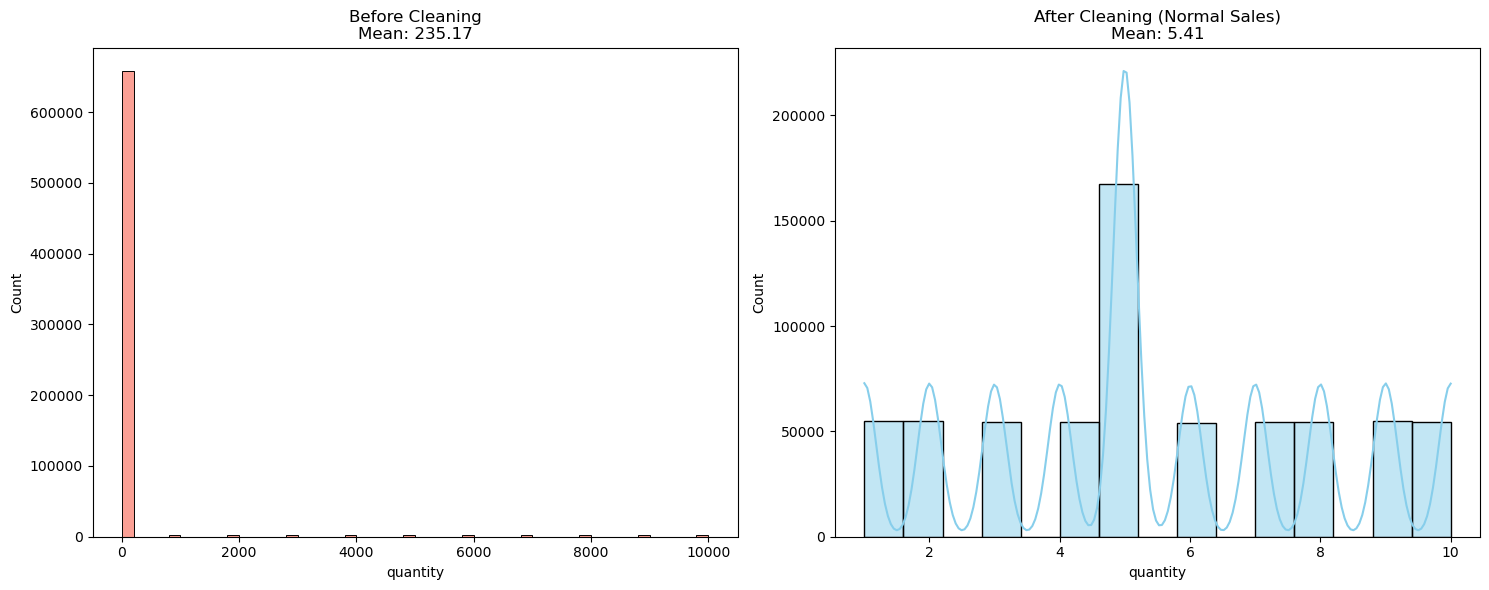

Data reduced from 686743 to 658054 rows.


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate boundaries
Q1 = df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# 2. Create the clean dataset
# Filtering: Only positive values and values below the upper IQR bound
df_clean = df[(df['quantity'] > 0) & (df['quantity'] <= upper_bound)]

# 3. Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Before Plot
sns.histplot(df['quantity'], bins=50, ax=axes[0], color='salmon')
axes[0].set_title(f"Before Cleaning\nMean: {df['quantity'].mean():.2f}")

# After Plot
sns.histplot(df_clean['quantity'], bins=15, ax=axes[1], color='skyblue', kde=True)
axes[1].set_title(f"After Cleaning (Normal Sales)\nMean: {df_clean['quantity'].mean():.2f}")

plt.tight_layout()
plt.show()

print(f"Data reduced from {len(df)} to {len(df_clean)} rows.")

In [29]:
# 1. Convert to proper datetime format first
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')

# 2. Create a specific column to track where data was missing
# This is useful for "Data Quality" reporting
df['date_was_missing'] = df['sale_date'].isnull()

# 3. Create your Time-Series sub-set
# We only want rows that have a date for trend analysis
df_trends = df.dropna(subset=['sale_date']).copy()

# 4. Extract Month and Year for easier plotting
df_trends['year'] = df_trends['sale_date'].dt.year
df_trends['month'] = df_trends['sale_date'].dt.month

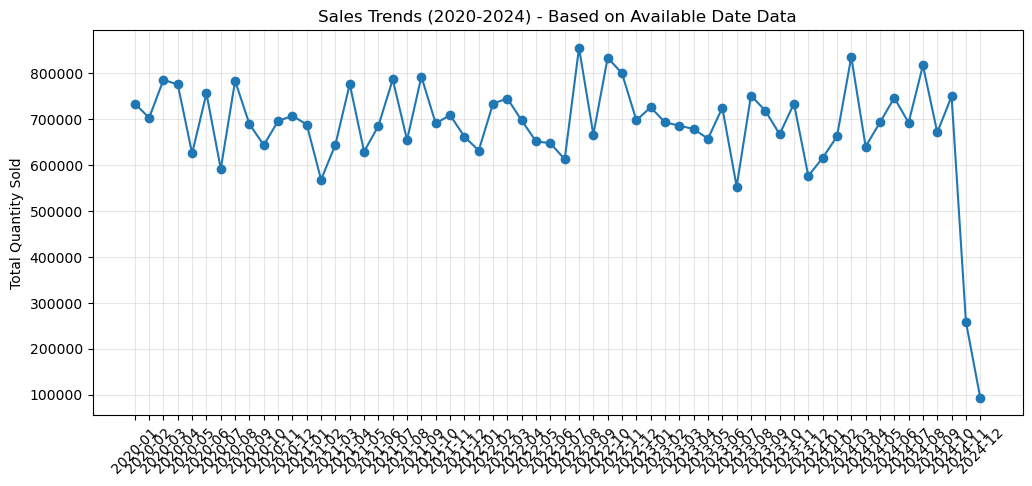

In [30]:
# Group by Month and Year to see the trend
monthly_sales = df_trends.groupby(['year', 'month'])['quantity'].sum().reset_index()

# Create a 'Period' string for the X-axis (e.g., "2023-01")
monthly_sales['period'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str).str.zfill(2)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(monthly_sales['period'], monthly_sales['quantity'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title("Sales Trends (2020-2024) - Based on Available Date Data")
plt.ylabel("Total Quantity Sold")
plt.grid(True, alpha=0.3)
plt.show()

In [40]:
df2=df_trends

In [42]:
df2

,sale_id,sale_date,store_id,product_id,quantity,date_was_missing,year,month
1,QX-999001,2022-04-13,ST-63,P-48,5.0,False,2022,4
2,JG-46890,2021-07-05,ST-26,P-79,5000.0,False,2021,7
6,ES-7238,2020-05-11,NAN,P-24,6.0,False,2020,5
11,PT-825391,2021-08-10,ST-7,P-62,5.0,False,2021,8
13,WB-9150,2022-11-04,ST-18,P-57,7.0,False,2022,11
...,...,...,...,...,...,...,...,...
1048557,IV-893190,2020-12-14,ST-15,P-64,4.0,False,2020,12
1048561,UM-109151,2020-09-18,ST-1,P-9,1.0,False,2020,9
1048563,AH-70370,2024-03-02,ST-64,P-15,5.0,False,2024,3
1048569,SZ-00006,2022-02-17,ST-27,P-61,4.0,False,2022,2


In [43]:
df2.isnull().sum()

sale_id             0
sale_date           0
store_id            0
product_id          0
quantity            0
date_was_missing    0
year                0
month               0
dtype: int64

--- Top 5 Best Selling Products ---
product_id
  nan      124967.0
  NAN       53978.0
P-46        27357.0
P-6         27277.0
P-57        27248.0
Name: quantity, dtype: float64


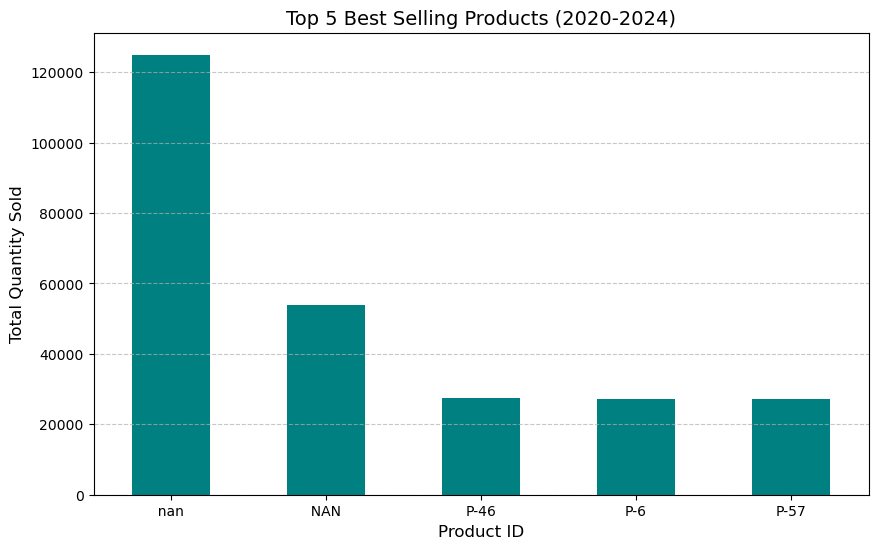

In [47]:
# 1. Group by product_id and sum the quantities
top_5_products = df_clean.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(5)

# 2. Display the result
print("--- Top 5 Best Selling Products ---")
print(top_5_products)

# 3. Create a Bar Chart for your report
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_5_products.plot(kind='bar', color='teal')
plt.title('Top 5 Best Selling Products (2020-2024)', fontsize=14)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=0) # Keeps product IDs horizontal and readable
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()